# 비화재보 분류 


---
## 1. 데이터 전처리     
---

### 각 년도별 데이터 결합 

In [2]:
import pandas as pd
import numpy as np 
import re
import pickle
import xlrd
import  matplotlib.pyplot as plt
from konlpy.tag import Okt 
okt = Okt()

start_year= 2016
end_year =2021

In [2]:
df_sum =pd.DataFrame()
#년도합치기
for year in range(start_year,end_year+1):
#시트 이름 가져오기    
    wb = xlrd.open_workbook(f"{year}년 전체 신고건수_관할 및 재난주소 추가.xls")
    globals()[f'df_{year}']=pd.DataFrame()
#Sheet 합치기
    for  i in range(len(wb.sheets())):
        tmp = pd.read_excel(f"{year}년 전체 신고건수_관할 및 재난주소 추가.xls",sheet_name = wb.sheet_names()[i]).loc[:,['접수번호','접수일시','신고내용','재난주소','신고자주소']]
        globals()[f'df_{year}']= pd.concat([globals()[f'df_{year}'],tmp], axis = 0)
    df_sum= pd.concat([df_sum,globals()[f'df_{year}']], axis = 0)
    #df_{Year}[year]=year 하면 년도구분가능 

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [83]:
# df_sum_1 =pd.DataFrame()
# #년도합치기
# for year in range(start_year,end_year+1):
# #시트 이름 가져오기    
#     wb = xlrd.open_workbook(f"{year}년 전체 신고건수_관할 및 재난주소 추가.xls")
#     globals()[f'df_{year}']=pd.DataFrame()
# #Sheet 합치기
#     for  i in range(len(wb.sheets())):
#         tmp = pd.read_excel(f"{year}년 전체 신고건수_관할 및 재난주소 추가.xls",sheet_name = wb.sheet_names()[i]).loc[:,['접수번호','접수일시','신고내용','재난주소','신고자주소','관할센터']]
#         globals()[f'df_{year}']= pd.concat([globals()[f'df_{year}'],tmp], axis = 0)
#     df_sum_1= pd.concat([df_sum_1,globals()[f'df_{year}']], axis = 0)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [6]:
df_sum= df_sum.dropna(subset=['신고내용'])
print(len(df_sum))
df_sum.drop_duplicates(subset = ['신고내용'],inplace=True)
print(len(df_sum))

In [97]:
# df_all2=df_sum_1
# df_all2.reset_index(inplace=True)
# df_all2.drop(columns=['index'],inplace=True)
# df_all2.reset_index(inplace=True)
# df_all2

,index,level_0,접수번호,접수일시,신고내용,재난주소,신고자주소,관할센터
0,0,0,QZ2783191652,20161231235927,NaN,,위치정보없음,NaN
1,1,1,QZ2783191651,20161231235902,문의 아이 아픔 아침 내원 가능 병원,,위치정보없음,NaN
2,2,2,QZ2783191650,20161231235757,(추가)라일락 아파트 101-401호 = 갑자기 쓰러진후 몸을 떨고 있다,대구광역시 달서구 성당동 725,(지)대구 달서구 감삼동,본리119안전센터
3,3,3,QZ2783191649,20161231235754,문의 아이 아픔 아침 내원 가능 병원,,위치정보없음,NaN
4,4,4,QZ2783191648,20161231235731,[다매체 SMS 신고] ㆍ,,위치정보없음,NaN
...,...,...,...,...,...,...,...,...
3177487,3177487,3177487,VO2785302400,20210101001632,[구급상황센터 이관]의료상담,,(지)대구 동구 율하동,NaN
3177488,3177488,3177488,VO2785302399,20210101000722,NaN,,(지)대구 북구 매천동 365-1 (V [닥터]한신더휴1단지 101동 1202호),NaN
3177489,3177489,3177489,VO2785302398,20210101000635,NaN,,위치정보없음,NaN
3177490,3177490,3177490,VO2785302397,20210101000233,7여아 /장염 / 의료 상담,,달성군 유가면-상리--:2:,NaN


In [101]:
# df_all2['신고내용'].dropna(inplace=True)
# df_all2.drop_duplicates(subset = ['신고내용'],inplace=True)
# df_all2 =df_all2[1:]

In [129]:
# df_all2.to_csv("전처리 데이터+센터.csv",encoding='utf-8-sig')

In [3]:
with open(f"119_신고_주소버전_{start_year} - {end_year}.pickle",'rb') as fr:
    df_all = pickle.load(fr)
df_all = df_all.drop(columns=['접수번호','신고자주소'])
df_all.reset_index(inplace=True)
df_all.drop(columns=['index'],inplace=True)
df_all.reset_index(inplace=True)
df_all

,index,접수일시,신고내용,재난주소
0,0,20161231235902,문의 아이 아픔 아침 내원 가능 병원,
1,1,20161231235757,(추가)라일락 아파트 101-401호 = 갑자기 쓰러진후 몸을 떨고 있다,대구광역시 달서구 성당동 725
2,2,20161231235731,[다매체 SMS 신고] ㆍ,
3,3,20161231235024,서변동 알러지반응 병원 안내,
4,4,20161231234451,소아과 병원,
...,...,...,...,...
1368095,1368095,20210101002819,월성주공3단지 307동 / 입구 / (추가)거동불가 / 남성,대구광역시 달서구 월성동 273
1368096,1368096,20210101001903,협성휴포레 107동 705호----여성--하혈(자궁근종),"대구광역시 동구 봉무동 1537 (협성휴포레 이시아폴리스, 104동)"
1368097,1368097,20210101001823,두류동145-7 /원룸 /201호 호흡곤란 (추가)신고자 현장으로 이동중(추가)환자...,대구광역시 달서구 두류동 145-7
1368098,1368098,20210101000233,7여아 /장염 / 의료 상담,


In [4]:
with open(f"최종_비화재보_내용_{start_year}-{end_year}.pickle",'rb') as fr:
    non_fire = pickle.load(fr)
df_non_fire = pd.DataFrame(non_fire)
df_non_fire.reset_index(inplace=True)
df_non_fire.drop(columns=[0],inplace=True)
df_non_fire


,index
0,24
1,133
2,199
3,473
4,642
...,...
10354,1367379
10355,1367403
10356,1367613
10357,1367624


In [5]:
df_geo=pd.merge(df_non_fire,df_all,how='left', left_on='index',right_on='index')

df_geo['address']= df_geo['재난주소']
pattern = '\(.*\)'
for i in range(len(df_geo)):
    a = df_geo['address'][i].split(' ')
    df_geo['address'][i] = " ".join(a[0:4])
df_geo= df_geo[df_geo['address'] != '  ']
df_geo    

C:\Users\user\AppData\Local\Temp/ipykernel_14792/1053548922.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['address'][i] = " ".join(a[0:4])


,index,접수일시,신고내용,재난주소,address
2,199,20161231181439,범어2동 165-15번지 미술학원 경보기 오작동,대구광역시 수성구 범어동 165-15,대구광역시 수성구 범어동 165-15
3,473,20161231061042,"현대바이오텍 , 경보기 오작동 추정 , 확인 /",대구광역시 서구 비산동 2041-115,대구광역시 서구 비산동 2041-115
4,642,20161230210800,내당동 미소노래방 221-1 번지 소방시설 경보기 오작동 010-2217-8809,대구광역시 서구 내당동 230-6 내당종합상가,대구광역시 서구 내당동 230-6
5,668,20161230201304,경보기오작동...,대구광역시 동구 신천동 90-1 (대구빌딩 지하1층),대구광역시 동구 신천동 90-1
7,992,20161230072236,천주성삼요양원 경보기 오작동.,대구광역시 수성구 신매동 567-9 천주성삼병원,대구광역시 수성구 신매동 567-9
...,...,...,...,...,...
10353,1367274,20210102062917,혁신파출소 경찰관 / 매여로1길 42 / 한성에스앤아이 회사 경보기 작동중 / 화재...,대구광역시 동구 상매동 511-1,대구광역시 동구 상매동 511-1
10354,1367379,20210101232250,옆건물 화재경보기가 울린다//(추가)본리리 109-1 필마트 옆건물(추가)화재징후 ...,대구광역시 달성군 화원읍 본리리 109-2 동산빌딩,대구광역시 달성군 화원읍 본리리
10356,1367613,20210101173226,속보기 / 010-3531-2851 / 옻골로 195-5 / 백불고텍건물 / 관계자...,대구광역시 동구 둔산동 386,대구광역시 동구 둔산동 386
10357,1367624,20210101171604,평리동 678-8 / 한마음노래방 / 화재경보기가 울린다 / 화재징후 없다,대구광역시 서구 평리동 678-8 한마음노래방,대구광역시 서구 평리동 678-8


In [116]:
# df_geo2=pd.merge(df_non_fire,df_all2,how='left', left_on='index',right_on='index')

# df_geo2['address']= df_geo2['재난주소']
# pattern = '\(.*\)'
# for i in range(len(df_geo2)):
#     a = df_geo2['address'][i].split(' ')
#     df_geo2['address'][i] = " ".join(a[0:4])
# df_geo2= df_geo2[df_geo2['address'] != '  ']
# df_geo2    

C:\Users\user\AppData\Local\Temp/ipykernel_14792/2928117460.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo2['address'][i] = " ".join(a[0:4])


,index,접수번호,접수일시,신고내용,재난주소,신고자주소,관할센터,address
2,199,QZ2783191088,20161231181439,범어2동 165-15번지 미술학원 경보기 오작동,대구광역시 수성구 범어동 165-15,(지)대구 수성구 범어1동,무열로119안전센터,대구광역시 수성구 범어동 165-15
3,473,QZ2783190241,20161231061042,"현대바이오텍 , 경보기 오작동 추정 , 확인 /",대구광역시 서구 비산동 2041-115,(지)대구 서구 비산7동,평리119안전센터,대구광역시 서구 비산동 2041-115
4,642,QZ2783189829,20161230210800,내당동 미소노래방 221-1 번지 소방시설 경보기 오작동 010-2217-8809,대구광역시 서구 내당동 230-6 내당종합상가,위치정보없음,내당119안전센터,대구광역시 서구 내당동 230-6
5,668,QZ2783189747,20161230201304,경보기오작동...,대구광역시 동구 신천동 90-1 (대구빌딩 지하1층),(도)대구광역시 동구 동대구로 487,신천119안전센터,대구광역시 동구 신천동 90-1
7,992,QZ2783188834,20161230072236,천주성삼요양원 경보기 오작동.,대구광역시 수성구 신매동 567-9 천주성삼병원,(지)대구 수성구 신매동,고산119안전센터,대구광역시 수성구 신매동 567-9
...,...,...,...,...,...,...,...,...
10353,1367274,VO2785303975,20210102062917,혁신파출소 경찰관 / 매여로1길 42 / 한성에스앤아이 회사 경보기 작동중 / 화재...,대구광역시 동구 상매동 511-1,위치정보없음,율하119안전센터,대구광역시 동구 상매동 511-1
10354,1367379,VO2785303805,20210101232250,옆건물 화재경보기가 울린다//(추가)본리리 109-1 필마트 옆건물(추가)화재징후 ...,대구광역시 달성군 화원읍 본리리 109-2 동산빌딩,(지)대구 달성군 화원읍 본리리,화원119안전센터,대구광역시 달성군 화원읍 본리리
10356,1367613,VO2785303407,20210101173226,속보기 / 010-3531-2851 / 옻골로 195-5 / 백불고텍건물 / 관계자...,대구광역시 동구 둔산동 386,(도)대구광역시 동구 옻골로 195-5,동촌119안전센터,대구광역시 동구 둔산동 386
10357,1367624,VO2785303380,20210101171604,평리동 678-8 / 한마음노래방 / 화재경보기가 울린다 / 화재징후 없다,대구광역시 서구 평리동 678-8 한마음노래방,(지)대구 서구 평리3동,평리119안전센터,대구광역시 서구 평리동 678-8


---
## 2. 분석
---

In [39]:

import json
import pandas as pd
import requests
from tqdm import tqdm
import numpy as np
#https://www.vworld.kr/dev/v4dv_apikey_s004.do

url = 'http://api.vworld.kr/req/address?'
params = 'service=address&request=getcoord&version=2.0&crs=epsg:4326&refine=true&simple=false&format=json&type='
road_type = 'PARCEL'
address = '&address='
keys = '&key='
primary_key = 'FD016F90-0D2F-3129-93F8-AEB42C9AA905'
# primary_key = 'E0C1965D-D3A2-3F7C-AC5C-2575621F399B'
geocode = pd.DataFrame(columns = ['신고내용','접수일시','address', 'x', 'y'])


In [40]:
def request_geo(road):
    page = requests.get(url+params+road_type+address+road+keys+primary_key)
    json_data = page.json()
    return json_data

def extraction_geo(test_data):
    geocode = pd.DataFrame(columns = ['신고내용','접수일시','address', 'x', 'y'])
    none = None
    for idx, road in tqdm(zip(test_data.index ,test_data['address'])):
        name = str(test_data['신고내용'][idx])
        date = str(test_data['접수일시'][idx])
        if len(str(road)) <= 5:
            geocode = geocode.append(
                    pd.DataFrame({'신고내용':name,
                    '접수일시':date,
                    'address':road,
                    'x':none,
                    'y':none},
                    index=[idx]))
            continue

        json_data = request_geo(road)

        if json_data['response']['status'] == 'NOT_FOUND' or json_data['response']['status'] == 'ERROR':
            geocode = geocode.append(
                    pd.DataFrame({'신고내용':name,
                    '접수일시':date,
                    'address':road,
                    'x':none,
                    'y':none},
                    index=[idx]))
            continue

        x = json_data['response']['result']['point']['x']
        y = json_data['response']['result']['point']['y']

        geocode = geocode.append(
            pd.DataFrame({'신고내용':name,
                    '접수일시':date,
                    'address':road,
                    'x':float(x),
                    'y':float(y)},
                    index=[idx]))
    return geocode
result = extraction_geo(df_geo)

8127it [16:39,  8.13it/s]


In [38]:
result.isnull().sum()
# 8127개중좌표가 없는 185개 제외

신고내용         0
접수일시         0
address      0
x          185
y          185
dtype: int64

In [42]:
result

,신고내용,접수일시,address,x,y
2,범어2동 165-15번지 미술학원 경보기 오작동,20161231181439,대구광역시 수성구 범어동 165-15,128.631258,35.859181
3,"현대바이오텍 , 경보기 오작동 추정 , 확인 /",20161231061042,대구광역시 서구 비산동 2041-115,128.545122,35.886149
4,내당동 미소노래방 221-1 번지 소방시설 경보기 오작동 010-2217-8809,20161230210800,대구광역시 서구 내당동 230-6,128.557194,35.860599
5,경보기오작동...,20161230201304,대구광역시 동구 신천동 90-1,128.624864,35.873875
7,천주성삼요양원 경보기 오작동.,20161230072236,대구광역시 수성구 신매동 567-9,128.705801,35.840710
...,...,...,...,...,...
10353,혁신파출소 경찰관 / 매여로1길 42 / 한성에스앤아이 회사 경보기 작동중 / 화재...,20210102062917,대구광역시 동구 상매동 511-1,128.703718,35.892685
10354,옆건물 화재경보기가 울린다//(추가)본리리 109-1 필마트 옆건물(추가)화재징후 ...,20210101232250,대구광역시 달성군 화원읍 본리리,128.506938,35.806593
10356,속보기 / 010-3531-2851 / 옻골로 195-5 / 백불고텍건물 / 관계자...,20210101173226,대구광역시 동구 둔산동 386,128.686886,35.908068
10357,평리동 678-8 / 한마음노래방 / 화재경보기가 울린다 / 화재징후 없다,20210101171604,대구광역시 서구 평리동 678-8,128.559022,35.877560


In [31]:
# result.to_csv('좌표변환_비화재보.csv',encoding='utf-8-sig')

In [47]:
df_소방센터 =pd.DataFrame()
#년도합치기
for year in range(start_year,end_year+1):
#시트 이름 가져오기    
    wb = xlrd.open_workbook(f"{year}년 전체 신고건수_관할 및 재난주소 추가.xls")
    globals()[f'df_{year}']=pd.DataFrame()
#Sheet 합치기
    for  i in range(len(wb.sheets())):
        tmp = pd.read_excel(f"{year}년 전체 신고건수_관할 및 재난주소 추가.xls",sheet_name = wb.sheet_names()[i]).loc[:,['관할센터']]
        globals()[f'df_{year}']= pd.concat([globals()[f'df_{year}'],tmp], axis = 0)
    df_소방센터= pd.concat([df_소방센터,globals()[f'df_{year}']], axis = 0)
    #df_{Year}[year]=year 하면 년도구분가능 

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [48]:
result['년도_월']=pd.to_datetime(result['접수일시'])

In [49]:
result

,신고내용,접수일시,address,x,y,년도_월
2,범어2동 165-15번지 미술학원 경보기 오작동,20161231181439,대구광역시 수성구 범어동 165-15,128.631258,35.859181,2016-12-31 18:14:39
3,"현대바이오텍 , 경보기 오작동 추정 , 확인 /",20161231061042,대구광역시 서구 비산동 2041-115,128.545122,35.886149,2016-12-31 06:10:42
4,내당동 미소노래방 221-1 번지 소방시설 경보기 오작동 010-2217-8809,20161230210800,대구광역시 서구 내당동 230-6,128.557194,35.860599,2016-12-30 21:08:00
5,경보기오작동...,20161230201304,대구광역시 동구 신천동 90-1,128.624864,35.873875,2016-12-30 20:13:04
7,천주성삼요양원 경보기 오작동.,20161230072236,대구광역시 수성구 신매동 567-9,128.705801,35.840710,2016-12-30 07:22:36
...,...,...,...,...,...,...
10353,혁신파출소 경찰관 / 매여로1길 42 / 한성에스앤아이 회사 경보기 작동중 / 화재...,20210102062917,대구광역시 동구 상매동 511-1,128.703718,35.892685,2021-01-02 06:29:17
10354,옆건물 화재경보기가 울린다//(추가)본리리 109-1 필마트 옆건물(추가)화재징후 ...,20210101232250,대구광역시 달성군 화원읍 본리리,128.506938,35.806593,2021-01-01 23:22:50
10356,속보기 / 010-3531-2851 / 옻골로 195-5 / 백불고텍건물 / 관계자...,20210101173226,대구광역시 동구 둔산동 386,128.686886,35.908068,2021-01-01 17:32:26
10357,평리동 678-8 / 한마음노래방 / 화재경보기가 울린다 / 화재징후 없다,20210101171604,대구광역시 서구 평리동 678-8,128.559022,35.877560,2021-01-01 17:16:04


In [61]:
result["year"]=result["년도_월"].dt.year
result["month"]=result["년도_월"].dt.month
result.drop(columns=['접수일시'],inplace=True)

In [281]:
year=result.groupby(['year']).count()['신고내용']
year=pd.DataFrame(year)
# year.to_csv('비화재보_년도별.csv',encoding='utf-8-sig')

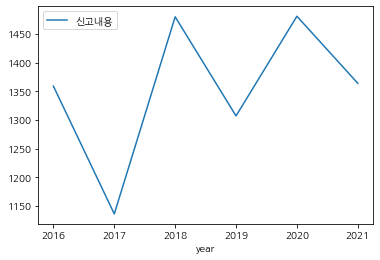

<Figure size 2000x2000 with 0 Axes>

In [288]:
year.plot()
plt.rc('font', family='NanumGothic')

In [128]:
# 신고센터=df_geo2.groupby(['관할센터']).count()['신고내용']
# 신고센터=pd.DataFrame(신고센터)
# 신고센터.sort_values('신고내용', ascending = False)
# 신고센터.to_csv('비화재보_신고센터.csv',encoding='utf-8-sig')

<AxesSubplot:xlabel='month'>

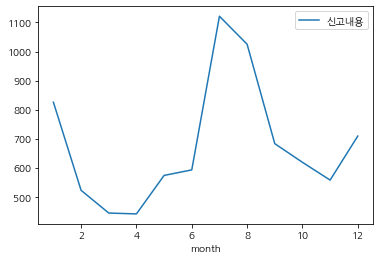

In [289]:
month=result.groupby(['month']).count()['신고내용']
month=pd.DataFrame(month)
# month.to_csv('비화재보_월별.csv',encoding='utf-8-sig')
month.plot()

In [82]:
result

,신고내용,address,x,y,년도_월,year,month
2,범어2동 165-15번지 미술학원 경보기 오작동,대구광역시 수성구 범어동 165-15,128.631258,35.859181,2016-12-31 18:14:39,2016,12
3,"현대바이오텍 , 경보기 오작동 추정 , 확인 /",대구광역시 서구 비산동 2041-115,128.545122,35.886149,2016-12-31 06:10:42,2016,12
4,내당동 미소노래방 221-1 번지 소방시설 경보기 오작동 010-2217-8809,대구광역시 서구 내당동 230-6,128.557194,35.860599,2016-12-30 21:08:00,2016,12
5,경보기오작동...,대구광역시 동구 신천동 90-1,128.624864,35.873875,2016-12-30 20:13:04,2016,12
7,천주성삼요양원 경보기 오작동.,대구광역시 수성구 신매동 567-9,128.705801,35.840710,2016-12-30 07:22:36,2016,12
...,...,...,...,...,...,...,...
10353,혁신파출소 경찰관 / 매여로1길 42 / 한성에스앤아이 회사 경보기 작동중 / 화재...,대구광역시 동구 상매동 511-1,128.703718,35.892685,2021-01-02 06:29:17,2021,1
10354,옆건물 화재경보기가 울린다//(추가)본리리 109-1 필마트 옆건물(추가)화재징후 ...,대구광역시 달성군 화원읍 본리리,128.506938,35.806593,2021-01-01 23:22:50,2021,1
10356,속보기 / 010-3531-2851 / 옻골로 195-5 / 백불고텍건물 / 관계자...,대구광역시 동구 둔산동 386,128.686886,35.908068,2021-01-01 17:32:26,2021,1
10357,평리동 678-8 / 한마음노래방 / 화재경보기가 울린다 / 화재징후 없다,대구광역시 서구 평리동 678-8,128.559022,35.877560,2021-01-01 17:16:04,2021,1


In [137]:
df_건물 = pd.read_csv("건물정보.csv",encoding='euc-kr')
df_건물 = df_건물[df_건물['NUMPOINTS']>0]

In [138]:
len(df_건물)

1724

In [206]:
df_건물정보=df_건물.loc[:,("A4",'A10','A12','A16','A23','A25','A27',"A29",'NUMPOINTS')]
df_건물정보

,A4,A10,A12,A16,A23,A25,A27,A29,NUMPOINTS
102,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,노유자시설,노인복지시설,문교사회용,1.0
131,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,제1종근린생활시설,제1종근린생활시설,상업용,1.0
136,대구광역시 중구 동인동1가,집합건축물,표제부,주건축물,철근콘크리트구조,공동주택,아파트,주거용,1.0
140,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,제2종근린생활시설,사무소,상업용,1.0
188,대구광역시 중구 동인동2가,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,숙박시설,여관,상업용,1.0
...,...,...,...,...,...,...,...,...,...
171515,대구광역시 달서구 호산동,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,근린생활시설,근린생활시설,상업용,1.0
171521,대구광역시 달서구 호산동,일반건축물,일반건축물대방,주건축물,일반철골구조,제2종근린생활시설,일반음식점,상업용,1.0
174137,대구광역시 달성군 화원읍 본리리,일반건축물,일반건축물대방,주건축물,경량철골구조,제2종근린생활시설,수리점,상업용,28.0
185544,대구광역시 달성군 현풍읍 원교리,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,창고시설,창고,기타,2.0


In [166]:
pd.DataFrame(df_건물정보.groupby('A4').count()['A10']).sort_values(['A10'],ascending=False)

,A10
A4,
대구광역시 남구 대명동,157
대구광역시 동구 신천동,73
대구광역시 북구 동천동,59
대구광역시 서구 비산동,58
대구광역시 서구 평리동,57
...,...
대구광역시 동구 숙천동,1
대구광역시 중구 대안동,1
대구광역시 수성구 욱수동,1


In [188]:
# pd.DataFrame(df_건물정보.groupby('A10').count()['A4']).sort_values(['A4'],ascending=False)


In [189]:
# pd.DataFrame(df_건물정보.groupby('A12').count()['A4']).sort_values(['A4'],ascending=False)

In [190]:
# pd.DataFrame(df_건물정보.groupby('A16').count()['A4']).sort_values(['A4'],ascending=False)


In [185]:
print(1360/1724)
pd.DataFrame(df_건물정보.groupby('A23').count()['A4']).sort_values(['A4'],ascending=False)


0.7888631090487239


,A4
A23,
철근콘크리트구조,1360
벽돌구조,141
일반철골구조,125
철골철근콘크리트구조,41
일반목구조,19
경량철골구조,14
블록구조,13
철골콘크리트구조,6
프리케스트콘크리트구조,4


In [186]:
print(503/1724)
print(362/1724)

pd.DataFrame(df_건물정보.groupby('A25').count()['A4']).sort_values(['A4'],ascending=False)


0.2917633410672854
0.2099767981438515


,A4
A25,
제2종근린생활시설,503
제1종근린생활시설,362
단독주택,224
공동주택,136
업무시설,62
공장,60
노유자시설,59
교육연구시설,58
숙박시설,54


In [201]:
print(154/1724)
pd.DataFrame(df_건물정보.groupby('A27').count()['A4']).sort_values(['A4'],ascending=False)


0.08932714617169374


,A4
A27,
일반음식점,154
사무소,123
단독주택,112
다가구주택,109
소매점,105
...,...
의약품판매소,1
인터넷컴퓨터게임시설제공업소,1
기타노유자시설,1


In [187]:
print(1039/1724)
pd.DataFrame(df_건물정보.groupby('A29').count()['A4']).sort_values(['A4'],ascending=False)


0.6026682134570766


,A4
A29,
상업용,1039
주거용,364
문교사회용,240
공업용,61
기타,12
공공용,4


In [176]:
df_건물_all = pd.read_csv("건물정보.csv",encoding='euc-kr')


In [208]:
df_건물all= df_건물_all.loc[:,("A4",'A10','A12','A16','A23','A25','A27',"A29",'NUMPOINTS')]
df_건물all

,A4,A10,A12,A16,A23,A25,A27,A29,NUMPOINTS
0,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,종교시설,교회,문교사회용,0.0
1,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,제1종근린생활시설,제1종근린생활시설,상업용,0.0
2,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,벽돌구조,제2종근린생활시설,일반음식점,상업용,0.0
3,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,블록구조,제1종근린생활시설,기타제1종근생활시설,상업용,0.0
4,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,벽돌구조,제2종근린생활시설,기타종교집회장,상업용,0.0
...,...,...,...,...,...,...,...,...,...
193624,대구광역시 달성군 구지면 도동리,일반건축물,일반건축물대방,주건축물,일반철골구조,동.식물 관련시설,축사,농수산용,0.0
193625,대구광역시 달성군 구지면 도동리,일반건축물,일반건축물대방,부속건축물,경량철골구조,동.식물 관련시설,축사,농수산용,0.0
193626,대구광역시 달성군 구지면 도동리,일반건축물,일반건축물대방,부속건축물,경량철골구조,동.식물 관련시설,축사,농수산용,0.0
193627,대구광역시 달성군 구지면 도동리,일반건축물,일반건축물대방,부속건축물,벽돌구조,단독주택,단독주택,주거용,0.0


In [180]:
pd.DataFrame(df_건물all.groupby('A4').count()['A10']).sort_values(['A10'],ascending=False)

                     A10
A4                      
대구광역시 남구 대명동       15521
대구광역시 서구 비산동       10338
대구광역시 서구 평리동        7722
대구광역시 북구 산격동        6147
대구광역시 동구 신암동        5314
...                  ...
대구광역시 동구 동내동           4
대구광역시 중구 도원동           4
대구광역시 달성군 다사읍 방천리      3
대구광역시 달성군 옥포면 송촌리      1
대구광역시 달성군 옥포면 본리리      1

[292 rows x 1 columns]
                 A4
A23                
벽돌구조          85589
철근콘크리트구조      59154
일반목구조         16870
블록구조          11982
일반철골구조        10711
경량철골구조         6267
강파이프구조          864
석구조             387
철골철근콘크리트구조      332
기타조적구조          298
기타강구조           285
프리케스트콘크리트구조     235
철골콘크리트구조        204
목구조             144
기타구조            123
조적구조             91
통나무구조            36
기타콘크리트구조         19
철골구조              2
기타철골철근콘크리트구조      1
콘크리트구조            1
                A4
A25               
단독주택        122313
제2종근린생활시설    18212
제1종근린생활시설    16339
공동주택         12654
공장            9510
창고시설          3678
교육연구시설        1843
동.식물 관련시설     1740
노

In [191]:

print(59154/193629)
pd.DataFrame(df_건물all.groupby('A23').count()['A4']).sort_values(['A4'],ascending=False)

0.30550175851757744


,A4
A23,
벽돌구조,85589
철근콘크리트구조,59154
일반목구조,16870
블록구조,11982
일반철골구조,10711
경량철골구조,6267
강파이프구조,864
석구조,387
철골철근콘크리트구조,332


In [1]:
print(18212/193629)
print(16339/193629)
print(12654/193629)

pd.DataFrame(df_건물all.groupby('A25').count()['A4']).sort_values(['A4'],ascending=False)

0.09405615894313352
0.08438302113836253
0.08084532792092093


NameError: name 'pd' is not defined

In [199]:
print((df_건물all[df_건물all['A27']=='일반음식점'].count()['A4'])/193629)
pd.DataFrame(df_건물all.groupby('A27').count()['A4']).sort_values(['A4'],ascending=False)

0.026540445904280868


,A4
A27,
단독주택,81186
다가구주택,40576
소매점,9481
일반공장,7487
다세대주택,6245
...,...
유스호스텔,1
음악당,1
접골원,1


In [200]:
print((df_건물all[df_건물all['A29']=='주거용'].count()['A4'])/193629)
print((df_건물all[df_건물all['A29']=='상업용'].count()['A4'])/193629)
pd.DataFrame(df_건물all.groupby('A29').count()['A4']).sort_values(['A4'],ascending=False)

0.6988415991406246
0.19491914950756342


,A4
A29,
주거용,135316
상업용,37742
공업용,9428
문교사회용,4848
기타,4136
농수산용,1745
공공용,101


In [209]:
df_건물all

,A4,A10,A12,A16,A23,A25,A27,A29,NUMPOINTS
0,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,종교시설,교회,문교사회용,0.0
1,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,제1종근린생활시설,제1종근린생활시설,상업용,0.0
2,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,벽돌구조,제2종근린생활시설,일반음식점,상업용,0.0
3,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,블록구조,제1종근린생활시설,기타제1종근생활시설,상업용,0.0
4,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,벽돌구조,제2종근린생활시설,기타종교집회장,상업용,0.0
...,...,...,...,...,...,...,...,...,...
193624,대구광역시 달성군 구지면 도동리,일반건축물,일반건축물대방,주건축물,일반철골구조,동.식물 관련시설,축사,농수산용,0.0
193625,대구광역시 달성군 구지면 도동리,일반건축물,일반건축물대방,부속건축물,경량철골구조,동.식물 관련시설,축사,농수산용,0.0
193626,대구광역시 달성군 구지면 도동리,일반건축물,일반건축물대방,부속건축물,경량철골구조,동.식물 관련시설,축사,농수산용,0.0
193627,대구광역시 달성군 구지면 도동리,일반건축물,일반건축물대방,부속건축물,벽돌구조,단독주택,단독주택,주거용,0.0


In [241]:
df_건물all[df_건물all['NUMPOINTS'] != 0]['비화재보']= 1
df_건물all['비화재보'] = [ 1 if t else 0 for t in list(df_건물all['NUMPOINTS'] != 0)]
#비화재보 1 아니면 0
df_건물all[df_건물all['비화재보']!=0]

C:\Users\user\AppData\Local\Temp/ipykernel_14792/1144193547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_건물all[df_건물all['NUMPOINTS'] != 0]['비화재보']= 1


,A4,A10,A12,A16,A23,A25,A27,A29,NUMPOINTS,비화재보
102,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,노유자시설,노인복지시설,문교사회용,1.0,1
131,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,제1종근린생활시설,제1종근린생활시설,상업용,1.0,1
136,대구광역시 중구 동인동1가,집합건축물,표제부,주건축물,철근콘크리트구조,공동주택,아파트,주거용,1.0,1
140,대구광역시 중구 동인동1가,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,제2종근린생활시설,사무소,상업용,1.0,1
188,대구광역시 중구 동인동2가,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,숙박시설,여관,상업용,1.0,1
...,...,...,...,...,...,...,...,...,...,...
171515,대구광역시 달서구 호산동,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,근린생활시설,근린생활시설,상업용,1.0,1
171521,대구광역시 달서구 호산동,일반건축물,일반건축물대방,주건축물,일반철골구조,제2종근린생활시설,일반음식점,상업용,1.0,1
174137,대구광역시 달성군 화원읍 본리리,일반건축물,일반건축물대방,주건축물,경량철골구조,제2종근린생활시설,수리점,상업용,28.0,1
185544,대구광역시 달성군 현풍읍 원교리,일반건축물,일반건축물대방,주건축물,철근콘크리트구조,창고시설,창고,기타,2.0,1


In [242]:
# df_건물all.to_csv("건물정보_예측용.csv",encoding='euc-kr')
df_건물all=pd.read_csv("건물정보_예측용.csv",encoding='euc-kr')

In [248]:
# df_건물all.isnull().sum()
df_건물all.drop(columns=['A16','A12'],inplace=True)
df_건물all.drop(columns=['A10'],inplace=True)
df_건물all.drop(columns=['비화재보'],inplace=True)


In [263]:
df_건물all.isnull().sum()


A4             0
A23           34
A25           78
A27          208
A29          313
NUMPOINTS      0
dtype: int64

In [273]:
df_건물all.groupby(['A29']).count().sort_values('A4',ascending=False)


,A4,A23,A25,A27,NUMPOINTS
A29,,,,,
주거용,135316,135303,135311,135314,135316
상업용,37742,37727,37736,37741,37742
공업용,9428,9427,9426,9426,9428
문교사회용,4848,4845,4848,4848,4848
기타,4136,4136,4135,4135,4136
농수산용,1745,1744,1745,1745,1745
공공용,101,101,101,101,101


In [272]:
df_건물all.groupby(['A27']).count().sort_values('A4',ascending=False)

,A4,A23,A25,A29,NUMPOINTS
A27,,,,,
단독주택,81186,81179,81186,81142,81186
다가구주택,40576,40573,40576,40576,40576
소매점,9481,9477,9478,9481,9481
일반공장,7487,7486,7487,7487,7487
다세대주택,6245,6245,6245,6245,6245
...,...,...,...,...,...
유스호스텔,1,1,1,1,1
음악당,1,1,1,1,1
접골원,1,1,1,1,1


In [255]:
from scipy.stats import mode

In [275]:
df_건물all['A23'].fillna(mode(df_건물all['A23'])[0][0],inplace=True)
df_건물all['A25'].fillna(mode(df_건물all['A25'])[0][0],inplace=True)
df_건물all['A27'].fillna(mode(df_건물all['A27'])[0][0],inplace=True)
df_건물all['A29'].fillna(mode(df_건물all['A29'])[0][0],inplace=True)
#최빈치로 결측값 대체

In [276]:
df_건물all.isnull().sum()
#결측치 0

A4           0
A23          0
A25          0
A27          0
A29          0
NUMPOINTS    0
dtype: int64

In [279]:
df_건물all

,A4,A23,A25,A27,A29,NUMPOINTS
0,대구광역시 중구 동인동1가,철근콘크리트구조,종교시설,교회,문교사회용,0.0
1,대구광역시 중구 동인동1가,철근콘크리트구조,제1종근린생활시설,제1종근린생활시설,상업용,0.0
2,대구광역시 중구 동인동1가,벽돌구조,제2종근린생활시설,일반음식점,상업용,0.0
3,대구광역시 중구 동인동1가,블록구조,제1종근린생활시설,기타제1종근생활시설,상업용,0.0
4,대구광역시 중구 동인동1가,벽돌구조,제2종근린생활시설,기타종교집회장,상업용,0.0
...,...,...,...,...,...,...
193624,대구광역시 달성군 구지면 도동리,일반철골구조,동.식물 관련시설,축사,농수산용,0.0
193625,대구광역시 달성군 구지면 도동리,경량철골구조,동.식물 관련시설,축사,농수산용,0.0
193626,대구광역시 달성군 구지면 도동리,경량철골구조,동.식물 관련시설,축사,농수산용,0.0
193627,대구광역시 달성군 구지면 도동리,벽돌구조,단독주택,단독주택,주거용,0.0
